In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import statistics

In [2]:
pd.set_option('display.max_colwidth', -1)

In [3]:
aorig = pd.read_csv('2017clean2.csv', header=0, index_col=0)
borig = pd.read_csv('2018clean2.csv', header=0, index_col=0)

print(aorig.shape)
print(borig.shape)
aorig.head(2)

(10555, 27)
(10772, 27)


,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted,Post,Val
0,"BRYANSTON SCHOOL,INCORPORATED","Bryanston House,\r\r\r\nBlandford,\r\r\r\nDorset,\r\r\r\nUnited Kingdom,\r\r\r\nDT11 0PX",00226143,85310,18.0,28.2,0.0,0.0,0.0,0.0,...,48.5,https://www.bryanston.co.uk/employment,Nick McRobb (Bursar and Clerk to the Governors),500 to 999,"""Bryanston School"",Incorporated",False,05/04/2018 00:00:00,27/03/2018 11:42:49,DT11 0PX,True
1,"RED BAND CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\r\r\nLeith Walk,\r\r\r\nEdinburgh,\r\r\r\nEH6 8NU",SC016876,47730,2.3,-2.7,15.0,37.5,15.6,66.7,...,81.9,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2018 00:00:00,28/03/2018 16:44:25,EH6 8NU,True


In [4]:
def ret_2(x):
    return str(x)[:2]

In [5]:
aorig['CI'] = aorig['CompanyNumber'].apply(ret_2)
borig['CI'] = borig['CompanyNumber'].apply(ret_2)

aorig.head(2)

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted,Post,Val,CI
0,"BRYANSTON SCHOOL,INCORPORATED","Bryanston House,\r\r\r\nBlandford,\r\r\r\nDorset,\r\r\r\nUnited Kingdom,\r\r\r\nDT11 0PX",00226143,85310,18.0,28.2,0.0,0.0,0.0,0.0,...,https://www.bryanston.co.uk/employment,Nick McRobb (Bursar and Clerk to the Governors),500 to 999,"""Bryanston School"",Incorporated",False,05/04/2018 00:00:00,27/03/2018 11:42:49,DT11 0PX,True,00
1,"RED BAND CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\r\r\nLeith Walk,\r\r\r\nEdinburgh,\r\r\r\nEH6 8NU",SC016876,47730,2.3,-2.7,15.0,37.5,15.6,66.7,...,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2018 00:00:00,28/03/2018 16:44:25,EH6 8NU,True,SC


In [6]:
aorig[aorig['SicCodes'].isnull()]['CI'].value_counts()[:10]

IP    151
OC    119
RC    79 
BR    54 
FC    32 
na    27 
RS    14 
SP    12 
SO    9  
04    8  
Name: CI, dtype: int64

In [7]:
aorig[aorig['SicCodes'].isnull() == False]['CI'].value_counts()[:10]

00    1379
na    1331
02    1322
03    1135
01    1120
04    744 
07    641 
05    537 
SC    500 
06    464 
Name: CI, dtype: int64

In [8]:
def sc_len(x):
    return len(str(x))

In [9]:
# Note that len == 4 is likely needs additional zero
aorig['SCLen'] = aorig['SicCodes'].apply(sc_len)
borig['SCLen'] = borig['SicCodes'].apply(sc_len)

aorig['SCLen'].value_counts()[:10]

5     6325
11    1103
15    1030
3     567 
25    468 
35    370 
1     345 
21    144 
4     65  
31    55  
Name: SCLen, dtype: int64

In [10]:
# examining len == 4
int_list = []

for i in aorig[aorig['SCLen'] == 4]['SicCodes'].tolist():
    if int(i):
        int_list.append(int(i))
        
print(min(int_list))
print(max(int_list))        

1130
9900


## Regex for Sic Codes

In [11]:
def find_sic(x):
    if x != None:
        return re.findall(r'\b[0-9]{4,5}(?![0-9])', str(x))

def find_sic_len(x):
    if x != None:
        return len(re.findall(r'\b[0-9]{4,5}(?![0-9])', str(x)))

In [12]:
aorig['Sic'] = aorig['SicCodes'].apply(find_sic)
aorig['SicLen'] = aorig['SicCodes'].apply(find_sic_len)

borig['Sic'] = borig['SicCodes'].apply(find_sic)
borig['SicLen'] = borig['SicCodes'].apply(find_sic_len)

aorig.head()

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted,Post,Val,CI,SCLen,Sic,SicLen
0,"BRYANSTON SCHOOL,INCORPORATED","Bryanston House,\r\r\r\nBlandford,\r\r\r\nDorset,\r\r\r\nUnited Kingdom,\r\r\r\nDT11 0PX",00226143,85310,18.0,28.2,0.0,0.0,0.0,0.0,...,"""Bryanston School"",Incorporated",False,05/04/2018 00:00:00,27/03/2018 11:42:49,DT11 0PX,True,00,5,[85310],1
1,"RED BAND CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\r\r\nLeith Walk,\r\r\r\nEdinburgh,\r\r\r\nEH6 8NU",SC016876,47730,2.3,-2.7,15.0,37.5,15.6,66.7,...,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2018 00:00:00,28/03/2018 16:44:25,EH6 8NU,True,SC,5,[47730],1
2,118 LIMITED,"Fusion Point,\r\r\r\nDumballs Road,\r\r\r\nCardiff,\r\r\r\nUnited Kingdom,\r\r\r\nCF10 5BF",03951948,61900,1.7,2.8,13.1,13.6,70.0,57.0,...,118 LIMITED,False,05/04/2018 00:00:00,27/03/2018 19:10:41,CF10 5BF,True,03,5,[61900],1
3,123 EMPLOYEES LTD,"34 Roundhay Road,\r\r\r\nLeeds,\r\r\r\nEngland,\r\r\r\nLS7 1AB",10530651,78300,41.0,36.0,-69.8,-157.2,50.0,73.5,...,123 EMPLOYEES LTD,True,05/04/2018 00:00:00,04/05/2018 11:24:06,LS7 1AB,True,10,5,[78300],1
4,1610 LIMITED,"Hestercombe House,\r\r\r\nCheddon Fitzpaine,\r\r\r\nTaunton,\r\r\r\nSomerset,\r\r\r\nUnited Kingdom,\r\r\r\nTA2 8LG",06727055,93110,-22.0,-34.0,-47.0,-67.0,25.0,75.0,...,1610 LIMITED,True,05/04/2018 00:00:00,12/04/2018 17:03:26,TA2 8LG,True,06,5,[93110],1


In [13]:
aorig['SicLen'].value_counts()

1    7493
2    1196
0    912 
3    535 
4    412 
5    3   
7    2   
6    2   
Name: SicLen, dtype: int64

## Validation

In [14]:
sics = pd.read_csv('siccodes.csv', header=0)

print(sics.shape)
sics.head(2)

(731, 5)


,sic_code,sic_description,section,section_description,sic_version
0,1110,"Growing of cereals (except rice), leguminous crops and oil seeds",A,"Agriculture, Forestry and Fishing",SIC 2007
1,1120,Growing of rice,A,"Agriculture, Forestry and Fishing",SIC 2007


In [15]:
sics['section_description'].value_counts()

Manufacturing                                               259
Wholesale and retail trade; repair of motor vehicles and    103
Administrative and support service activities               44 
Agriculture, Forestry and Fishing                           40 
Financial and insurance activities                          34 
Transportation and storage                                  33 
Professional, scientific and technical activities           33 
Information and communication                               32 
Construction                                                25 
Other service activities                                    19 
Arts, entertainment and recreation                          17 
Mining and Quarrying                                        16 
Human health and social work activities                     13 
Accommodation and food service activities                   13 
Education                                                   12 
Water supply, sewerage, waste management

In [16]:
sics.head(2)

,sic_code,sic_description,section,section_description,sic_version
0,1110,"Growing of cereals (except rice), leguminous crops and oil seeds",A,"Agriculture, Forestry and Fishing",SIC 2007
1,1120,Growing of rice,A,"Agriculture, Forestry and Fishing",SIC 2007


In [17]:
sic_dict = pd.Series(sics.section_description.values,index=sics.sic_code).to_dict()

print(f'Sic dictionary length: {len(sic_dict)}')

Sic dictionary length: 731


In [18]:
def find_sec(x):
    sec_list = []
    for i in x:
        if int(i) in sic_dict.keys():
            sec_list.append(sic_dict[int(i)])
        else:
            sec_list.append('NotFound')
        
    return sec_list

In [19]:
aorig['SecList'] = aorig['Sic'].apply(find_sec)
borig['SecList'] = borig['Sic'].apply(find_sec)

aorig.head(2)

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,SubmittedAfterTheDeadline,DueDate,DateSubmitted,Post,Val,CI,SCLen,Sic,SicLen,SecList
0,"BRYANSTON SCHOOL,INCORPORATED","Bryanston House,\r\r\r\nBlandford,\r\r\r\nDorset,\r\r\r\nUnited Kingdom,\r\r\r\nDT11 0PX",00226143,85310,18.0,28.2,0.0,0.0,0.0,0.0,...,False,05/04/2018 00:00:00,27/03/2018 11:42:49,DT11 0PX,True,00,5,[85310],1,[Education]
1,"RED BAND CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\r\r\nLeith Walk,\r\r\r\nEdinburgh,\r\r\r\nEH6 8NU",SC016876,47730,2.3,-2.7,15.0,37.5,15.6,66.7,...,False,05/04/2018 00:00:00,28/03/2018 16:44:25,EH6 8NU,True,SC,5,[47730],1,[Wholesale and retail trade; repair of motor vehicles and]


In [20]:
# all sic codes have a associated section
aorig[aorig['SecList'].apply(lambda x: 'NotFound' in x)]

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,SubmittedAfterTheDeadline,DueDate,DateSubmitted,Post,Val,CI,SCLen,Sic,SicLen,SecList


In [21]:
print(f"# of 2017 rows missing section: {len(aorig[aorig['SecList'].str.len() == 0])}")
print(f"# of 2018 rows missing section: {len(borig[borig['SecList'].str.len() == 0])}")

# of 2017 rows missing section: 912
# of 2018 rows missing section: 666


In [22]:
def ret_mode(x):
    
    if len(x) != 0:
    
        try:
            return statistics.mode(x)

        except statistics.StatisticsError:

            return x[0]

In [23]:
aorig['MainSic'] = aorig['Sic'].apply(ret_mode)
borig['MainSic'] = borig['Sic'].apply(ret_mode)
aorig['MainSection'] = aorig['SecList'].apply(ret_mode)
borig['MainSection'] = borig['SecList'].apply(ret_mode)

aorig.head(2)

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,DateSubmitted,Post,Val,CI,SCLen,Sic,SicLen,SecList,MainSic,MainSection
0,"BRYANSTON SCHOOL,INCORPORATED","Bryanston House,\r\r\r\nBlandford,\r\r\r\nDorset,\r\r\r\nUnited Kingdom,\r\r\r\nDT11 0PX",00226143,85310,18.0,28.2,0.0,0.0,0.0,0.0,...,27/03/2018 11:42:49,DT11 0PX,True,00,5,[85310],1,[Education],85310,Education
1,"RED BAND CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\r\r\nLeith Walk,\r\r\r\nEdinburgh,\r\r\r\nEH6 8NU",SC016876,47730,2.3,-2.7,15.0,37.5,15.6,66.7,...,28/03/2018 16:44:25,EH6 8NU,True,SC,5,[47730],1,[Wholesale and retail trade; repair of motor vehicles and],47730,Wholesale and retail trade; repair of motor vehicles and


In [24]:
print(f"# of 2017 companies missing section: {len(aorig[aorig['MainSection'].isnull()])}")
print(f"# of 2018 companies missing section: {len(borig[borig['MainSection'].isnull()])}")

# of 2017 companies missing section: 912
# of 2018 companies missing section: 666


In [25]:
aorig.drop(['CI', 'SCLen', 'Sic', 'SicLen', 'SecList'], axis=1, inplace=True)
borig.drop(['CI', 'SCLen', 'Sic', 'SicLen', 'SecList'], axis=1, inplace=True)

aorig.head(2)

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted,Post,Val,MainSic,MainSection
0,"BRYANSTON SCHOOL,INCORPORATED","Bryanston House,\r\r\r\nBlandford,\r\r\r\nDorset,\r\r\r\nUnited Kingdom,\r\r\r\nDT11 0PX",00226143,85310,18.0,28.2,0.0,0.0,0.0,0.0,...,Nick McRobb (Bursar and Clerk to the Governors),500 to 999,"""Bryanston School"",Incorporated",False,05/04/2018 00:00:00,27/03/2018 11:42:49,DT11 0PX,True,85310,Education
1,"RED BAND CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\r\r\nLeith Walk,\r\r\r\nEdinburgh,\r\r\r\nEH6 8NU",SC016876,47730,2.3,-2.7,15.0,37.5,15.6,66.7,...,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2018 00:00:00,28/03/2018 16:44:25,EH6 8NU,True,47730,Wholesale and retail trade; repair of motor vehicles and


## Clean Bonus Outliers

In [26]:
# UK Guidelines:

# mean gender pay gap in hourly pay
# median gender pay gap in hourly pay
# mean bonus gender pay gap
# median bonus gender pay gap
# proportion of males and females receiving a bonus payment
# proportion of males and females in each pay quartile

In [27]:
# NOTE:

# There is a lot of bad data for bonuses as +/- 100% is max but many companies exceed this

In [28]:
borig.describe().iloc[:,2:6]

,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent
count,9044.000000,9044.000000,10772.000000,10772.000000
mean,18.440038,-0.985781,35.774573,34.440596
std,219.276775,295.693848,36.676898,36.377350
min,-13934.000000,-14490.800000,0.000000,0.000000
25%,0.000000,0.000000,0.775000,0.300000
50%,32.100000,15.500000,19.300000,17.350000
75%,56.625000,43.000000,75.200000,72.000000
max,134.200000,4000.000000,100.000000,100.000000


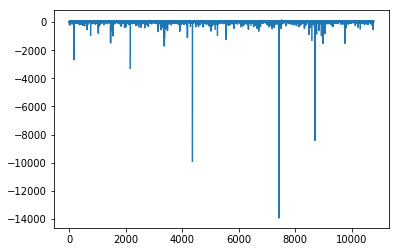

In [29]:
plt.plot(borig['DiffMeanBonusPercent'])

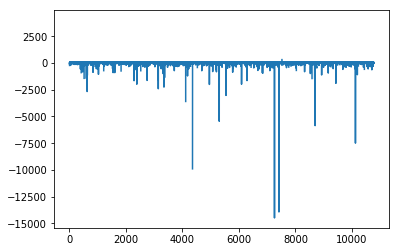

In [30]:
plt.plot(borig['DiffMedianBonusPercent'])

In [31]:
print(f"2018 Mean Bonus highend: {len(borig[borig['DiffMeanBonusPercent'] == 100])}")
print(f"2018 Mean Bonus lowend: {len(borig[borig['DiffMeanBonusPercent'] == -100])}")
print(f"2017 Mean Bonus highend: {len(aorig[aorig['DiffMeanBonusPercent'] == 100])}")
print(f"2017 Mean Bonus lowend: {len(aorig[aorig['DiffMeanBonusPercent'] == -100])}")
print('\n')
print(f"2018 Median Bonus highend: {len(borig[borig['DiffMedianBonusPercent'] == 100])}")
print(f"2018 Median Bonus lowend: {len(borig[borig['DiffMedianBonusPercent'] == -100])}")
print(f"2017 Median Bonus highend: {len(aorig[aorig['DiffMedianBonusPercent'] == 100])}")
print(f"2017 Median Bonus lowend: {len(aorig[aorig['DiffMedianBonusPercent'] == -100])}")

2018 Mean Bonus highend: 183
2018 Mean Bonus lowend: 13
2017 Mean Bonus highend: 198
2017 Mean Bonus lowend: 45


2018 Median Bonus highend: 186
2018 Median Bonus lowend: 49
2017 Median Bonus highend: 213
2017 Median Bonus lowend: 73


In [32]:
print(f"2018 Mean Bonus outliers: {len(borig[abs(borig['DiffMeanBonusPercent']) > 100])}")
print(f"2017 Mean Bonus outliers: {len(aorig[abs(aorig['DiffMeanBonusPercent']) > 100])}")
print('\n')
print(f"2018 Median Bonus outliers: {len(borig[abs(borig['DiffMedianBonusPercent']) > 100])}")
print(f"2017 Median Bonus outliers: {len(aorig[abs(aorig['DiffMedianBonusPercent']) > 100])}")

2018 Mean Bonus outliers: 233
2017 Mean Bonus outliers: 291


2018 Median Bonus outliers: 383
2017 Median Bonus outliers: 356


In [33]:
print(f"2018 Mean Bonus NaN: {len(borig[borig['DiffMeanBonusPercent'].isnull()])}")
print(f"2017 Mean Bonus NaN: {len(aorig[aorig['DiffMeanBonusPercent'].isnull()])}")
print('\n')
print(f"2018 Median Bonus NaN: {len(borig[borig['DiffMedianBonusPercent'].isnull()])}")
print(f"2017 Median Bonus NaN: {len(aorig[aorig['DiffMedianBonusPercent'].isnull()])}")

2018 Mean Bonus NaN: 1728
2017 Mean Bonus NaN: 15


2018 Median Bonus NaN: 1728
2017 Median Bonus NaN: 15


In [34]:
borig.loc[abs(borig.DiffMeanBonusPercent) > 100, 'DiffMeanBonusPercent'] = np.nan
aorig.loc[abs(aorig.DiffMeanBonusPercent) > 100, 'DiffMeanBonusPercent'] = np.nan

borig.loc[abs(borig.DiffMedianBonusPercent) > 100, 'DiffMedianBonusPercent'] = np.nan
aorig.loc[abs(aorig.DiffMedianBonusPercent) > 100, 'DiffMedianBonusPercent'] = np.nan

In [35]:
print(f"2018 Mean new NaN: {len(borig[borig['DiffMeanBonusPercent'].isnull()])}")
print(f"2017 Mean new NaN: {len(aorig[aorig['DiffMeanBonusPercent'].isnull()])}")
print('\n')
print(f"2018 Median new NaN: {len(borig[borig['DiffMedianBonusPercent'].isnull()])}")
print(f"2017 Median new NaN: {len(aorig[aorig['DiffMedianBonusPercent'].isnull()])}")

2018 Mean new NaN: 1961
2017 Mean new NaN: 306


2018 Median new NaN: 2111
2017 Median new NaN: 371


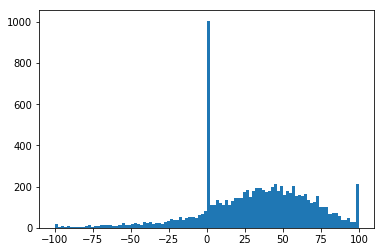

In [36]:
plt.hist(borig[borig['DiffMeanBonusPercent'].isnull() == False]['DiffMeanBonusPercent'], bins=100)

plt.show()

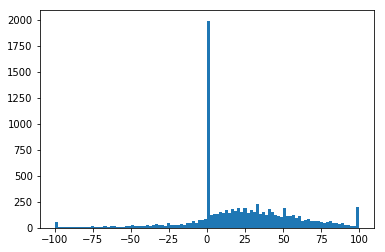

In [37]:
plt.hist(borig[borig['DiffMedianBonusPercent'].isnull() == False]['DiffMedianBonusPercent'], bins=100)

plt.show()

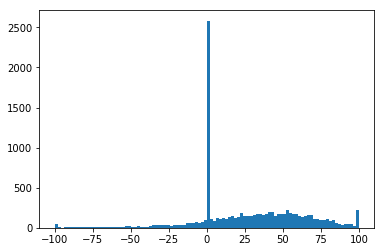

In [38]:
plt.hist(aorig[aorig['DiffMeanBonusPercent'].isnull() == False]['DiffMeanBonusPercent'], bins=100)

plt.show()

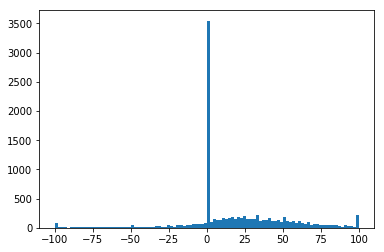

In [39]:
plt.hist(aorig[aorig['DiffMedianBonusPercent'].isnull() == False]['DiffMedianBonusPercent'], bins=100)

plt.show()

In [40]:
borig.describe().iloc[:,2:6]

,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent
count,8811.000000,8661.000000,10772.000000,10772.000000
mean,30.788004,21.482600,35.774573,34.440596
std,36.460871,35.403231,36.676898,36.377350
min,-100.000000,-100.000000,0.000000,0.000000
25%,2.500000,0.000000,0.775000,0.300000
50%,33.400000,17.700000,19.300000,17.350000
75%,57.150000,44.500000,75.200000,72.000000
max,100.000000,100.000000,100.000000,100.000000


In [41]:
aorig.describe().iloc[:,2:6]

,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent
count,10249.000000,10184.000000,10555.000000,10555.000000
mean,26.048824,17.822329,35.400957,33.939223
std,35.911920,34.487078,36.326217,36.015667
min,-100.000000,-100.000000,0.000000,0.000000
25%,0.000000,0.000000,0.800000,0.300000
50%,23.300000,7.400000,19.400000,17.200000
75%,53.300000,38.900000,73.200000,70.050000
max,100.000000,100.000000,100.000000,100.000000


In [42]:
# aorig.to_csv('2017clean3.csv')
# borig.to_csv('2018clean3.csv')

In [43]:
# this concludes pt 03.4